<h1>The Sparks Foundation/Graduate Rotational Internship Program(GRIP)</h1>
<h2>Task1: Prediction using Supervised ML</h2>
Ashok Timsina

<h3>Task Description : In this task one has to design a model which predicts the score of student on the basis of hours s/he has studied for certain examination.</h3>

<h3>Importing relevant packages</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h4>Getting the data</h4>

In [2]:
dfile = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(dfile)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print(df.shape)
df.describe()

(25, 2)


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()  #to get the info about null data points and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<h3>The data set does not seem to have any missing value so we can now start analysing the data.<br>
Now lets plot the data and see for the relation beween two variables Hours and Scores
</h3>

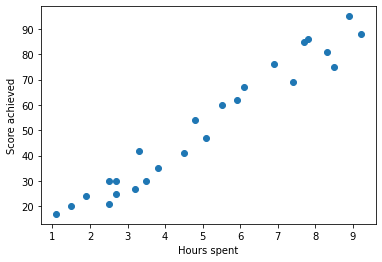

In [5]:
X = df['Hours'].to_numpy().reshape(-1,1)
y = df['Scores'].to_numpy().reshape(-1,1)
plt.scatter(X,y)
plt.xlabel("Hours spent")
plt.ylabel("Score achieved")
plt.show()

<h3>The variables Hours and Score seem to have positive linear Correlation. Lets check that using the corr function..</h3>

In [6]:
df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


So the data points are positively linearly corelated.
<h1>Making the data ready</h1>
Dividing the data into train and test set so that test set can be used to check the accuracy of the model.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h4>Training a linear model</h4>

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h3>Plotting the line</h3>

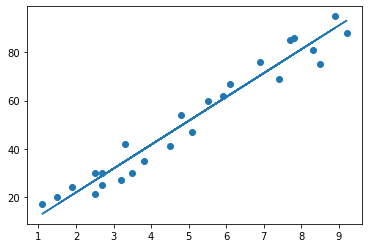

In [9]:
Y = model.coef_*X + model.intercept_ #Value of Y predicted by the model
plt.scatter(X,y)
plt.plot(X,Y); #plotting the best fit line obtained from Linear Regression
plt.show()

In [10]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)
#looking at the actual and predicted scores

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]
[[20]
 [27]
 [69]
 [30]
 [62]]


<h4>Model Evaluation</h4>

In [11]:
from sklearn import metrics
mse = metrics.mean_absolute_error(y_test, y_pred)
r2score = metrics.r2_score(y_test, y_pred)
print('Mean Square error = ' + str(mse))
print('Rsquared value = ' + str(r2score))

Mean Square error = 4.183859899002975
Rsquared value = 0.9454906892105356


<h5>The model seem to be preety decent with almost 94% accuracy.</h5>
<h3>Now training linear model with all data available and making the prediction</h3>

In [13]:
final_model = LinearRegression()
final_model.fit(X,y)
prediction = final_model.predict([[9.25]])
print('If a student studies for 9.25 hrs/ day his/her score will be {}'.format(prediction))

If a student studies for 9.25 hrs/ day his/her score will be [[92.90985477]]
